# DỰ ÁN: XÂY DỰNG MÔ HÌNH MACHINE LEARNING PHÁT HIỆN GIAN LẬN THẺ TÍN DỤNG

**Tác giả:** Vũ Minh Đức
**Ngày thực hiện:** 11/06/2025
**Mục tiêu:** Dự án này được thực hiện nhằm chứng minh khả năng tự học và áp dụng các kỹ thuật phân tích dữ liệu vào một bài toán thực tế trong ngành tài chính. Các bước chính bao gồm:
1.  Khám phá và phân tích bộ dữ liệu giao dịch thẻ tín dụng.
2.  Nhận diện và xử lý vấn đề cốt lõi của bài toán: **Dữ liệu mất cân bằng (Imbalanced Data)**.
3.  Xây dựng, huấn luyện và so sánh các mô hình Machine Learning.
4.  Đánh giá hiệu quả của mô hình bằng các chỉ số phù hợp (Precision, Recall, AUC-ROC).

In [1]:
# --- 2.1: KHAI BÁO CÁC THƯ VIỆN CẦN THIẾT ---
# Thư viện cho xử lý dữ liệu và tính toán
import pandas as pd
import numpy as np

# Thư viện cho trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện cho Machine Learning từ Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Thư viện để xử lý dữ liệu mất cân bằng
from imblearn.over_sampling import SMOTE

# Cài đặt để các biểu đồ được hiển thị ngay trong notebook
%matplotlib inline

print("Các thư viện đã được nạp thành công!")

Các thư viện đã được nạp thành công!


In [7]:
# --- 2.2: TẢI DỮ LIỆU ---
# Đọc file dữ liệu 'creditcard.csv' vào một cấu trúc dữ liệu gọi là DataFrame
# Đảm bảo file csv và file notebook này nằm chung trong một thư mục
try:
    df = pd.read_csv('creditcard.csv')
    print("Tải dữ liệu thành công!")
    print(f"Bộ dữ liệu có {df.shape[0]} hàng và {df.shape[1]} cột.")
except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'creditcard.csv'. Vui lòng kiểm tra lại vị trí file.")

Tải dữ liệu thành công!
Bộ dữ liệu có 284807 hàng và 31 cột.


In [8]:
# --- 3.1: XEM QUA DỮ LIỆU ---
# Hiển thị 5 dòng đầu tiên để hiểu cấu trúc dữ liệu
print("5 dòng dữ liệu đầu tiên:")
display(df.head())

# Hiển thị thông tin tổng quan: tên cột, số lượng giá trị không thiếu, và kiểu dữ liệu
print("\nThông tin tổng quan (Data Info):")
df.info()

5 dòng dữ liệu đầu tiên:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Thông tin tổng quan (Data Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807

In [9]:
# --- 3.2: KIỂM TRA DỮ LIỆU THIẾU ---
# Kiểm tra xem có ô nào trong bộ dữ liệu bị bỏ trống không
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("Tuyệt vời! Bộ dữ liệu không có giá trị nào bị thiếu.")
else:
    print(f"Cảnh báo: Bộ dữ liệu có {missing_values} giá trị bị thiếu cần xử lý.")

Tuyệt vời! Bộ dữ liệu không có giá trị nào bị thiếu.


Phân bố các lớp trong dữ liệu:
Class
0    284315
1       492
Name: count, dtype: int64

Tỷ lệ giao dịch gian lận chỉ chiếm: 0.173%


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9412\1820585451.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])


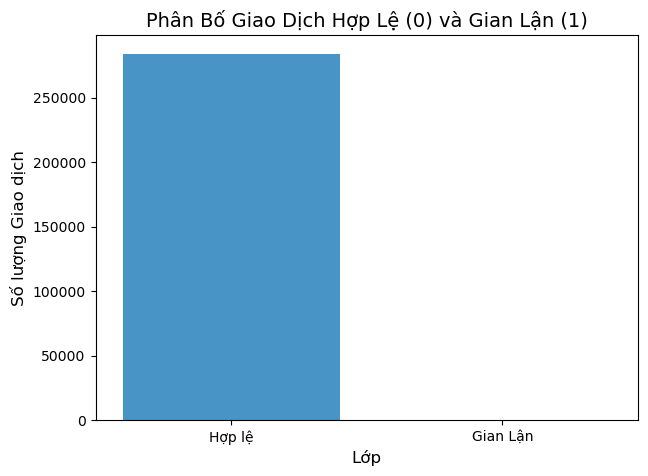


=> NHẬN XÉT: Đây là một bộ dữ liệu cực kỳ mất cân bằng. Đây là thách thức lớn nhất của bài toán.


In [10]:
# --- 3.3: PHÂN TÍCH SỰ MẤT CÂN BẰNG CỦA BIẾN MỤC TIÊU 'CLASS' ---
# Biến 'Class' cho biết một giao dịch là hợp lệ (0) hay gian lận (1)
class_counts = df['Class'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print("Phân bố các lớp trong dữ liệu:")
print(class_counts)
print(f"\nTỷ lệ giao dịch gian lận chỉ chiếm: {fraud_percentage:.3f}%")

# Trực quan hóa sự mất cân bằng
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Phân Bố Giao Dịch Hợp Lệ (0) và Gian Lận (1)', fontsize=14)
plt.ylabel('Số lượng Giao dịch', fontsize=12)
plt.xlabel('Lớp', fontsize=12)
plt.xticks([0, 1], ['Hợp lệ', 'Gian Lận'])
plt.show()

print("\n=> NHẬN XÉT: Đây là một bộ dữ liệu cực kỳ mất cân bằng. Đây là thách thức lớn nhất của bài toán.")

In [11]:
# --- 4.1: CHUẨN HÓA DỮ LIỆU ---
# Các cột V1-V28 đã được ẩn danh và chuẩn hóa (PCA).
# Tuy nhiên, cột 'Amount' (số tiền) và 'Time' (thời gian) có thang đo rất khác.
# Chúng ta cần đưa chúng về cùng một thang đo để mô hình hoạt động tốt hơn.

scaler = StandardScaler()

# Tạo các cột mới đã được chuẩn hóa
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Xóa các cột gốc không còn cần thiết
df.drop(['Time', 'Amount'], axis=1, inplace=True)

print("Đã chuẩn hóa cột 'Amount' và 'Time'. Dữ liệu sau khi xử lý:")
display(df.head())

Đã chuẩn hóa cột 'Amount' và 'Time'. Dữ liệu sau khi xử lý:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [12]:
# --- 4.2: TÁCH DỮ LIỆU THÀNH TẬP HUẤN LUYỆN VÀ TẬP KIỂM TRA ---
# X: là các biến độc lập (features), dùng để dự đoán. Gồm tất cả các cột trừ 'Class'.
# y: là biến mục tiêu (target), là thứ chúng ta muốn dự đoán ('Class').
X = df.drop('Class', axis=1)
y = df['Class']

# Chia dữ liệu: 80% cho việc huấn luyện mô hình, 20% để kiểm tra hiệu quả.
# 'stratify=y' đảm bảo tỷ lệ gian lận trong tập train và test là như nhau.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Kích thước của các tập dữ liệu:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Kích thước của các tập dữ liệu:
X_train: (227845, 30)
X_test: (56962, 30)
y_train: (227845,)
y_test: (56962,)


In [13]:
# --- 5.1: ÁP DỤNG SMOTE ---
# SMOTE (Synthetic Minority Over-sampling Technique) sẽ tạo ra các mẫu dữ liệu 'tổng hợp'
# cho lớp thiểu số (gian lận) để cân bằng với lớp đa số (hợp lệ).
# **Lưu ý quan trọng: Chỉ áp dụng SMOTE trên tập huấn luyện (X_train, y_train).**

print("Số lượng các lớp trong tập huấn luyện TRƯỚC KHI dùng SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nSố lượng các lớp trong tập huấn luyện SAU KHI dùng SMOTE:")
print(y_train_resampled.value_counts())

print("\n=> NHẬN XÉT: Tập huấn luyện bây giờ đã hoàn toàn cân bằng.")

Số lượng các lớp trong tập huấn luyện TRƯỚC KHI dùng SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

Số lượng các lớp trong tập huấn luyện SAU KHI dùng SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

=> NHẬN XÉT: Tập huấn luyện bây giờ đã hoàn toàn cân bằng.


In [14]:
# --- 6.1: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH RANDOM FOREST ---
# Random Forest là một mô hình mạnh mẽ, được liệt kê trong tin tuyển dụng.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True)

print("Bắt đầu huấn luyện mô hình Random Forest. Quá trình này có thể mất vài phút...")
# Huấn luyện mô hình trên dữ liệu đã được cân bằng
rf_model.fit(X_train_resampled, y_train_resampled)
print("Huấn luyện hoàn tất!")

# Đưa ra dự đoán trên tập kiểm tra (dữ liệu mà mô hình chưa từng thấy)
y_pred_rf = rf_model.predict(X_test)

Bắt đầu huấn luyện mô hình Random Forest. Quá trình này có thể mất vài phút...
Huấn luyện hoàn tất!


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ---

1. Báo cáo Phân loại (Classification Report):
              precision    recall  f1-score   support

  Hợp lệ (0)       1.00      1.00      1.00     56864
Gian Lận (1)       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

2. Chỉ số AUC-ROC: 0.9080

3. Ma trận Nhầm lẫn (Confusion Matrix):


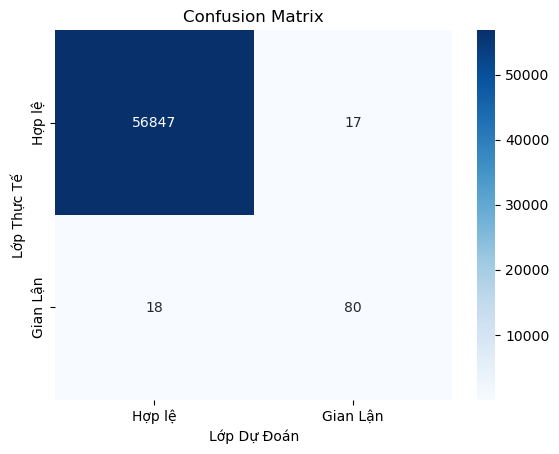

In [15]:
# --- 6.2: ĐÁNH GIÁ HIỆU QUẢ CỦA MÔ HÌNH ---
print("--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ---")

# In báo cáo phân loại chi tiết
# Precision: Độ chính xác khi dự đoán gian lận. (TP / (TP + FP))
# Recall: Khả năng phát hiện gian lận. (TP / (TP + FN)) - **CHỈ SỐ QUAN TRỌNG NHẤT**
# F1-score: Trung bình hài hòa của Precision và Recall.
print("\n1. Báo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_rf, target_names=['Hợp lệ (0)', 'Gian Lận (1)']))

# In chỉ số AUC-ROC
# Chỉ số này đo lường khả năng phân biệt giữa 2 lớp của mô hình. Càng gần 1 càng tốt.
roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"2. Chỉ số AUC-ROC: {roc_auc:.4f}")

# Trực quan hóa Confusion Matrix
print("\n3. Ma trận Nhầm lẫn (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hợp lệ', 'Gian Lận'], yticklabels=['Hợp lệ', 'Gian Lận'])
plt.ylabel('Lớp Thực Tế')
plt.xlabel('Lớp Dự Đoán')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# --- 6.3: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH XGBOOST ---
# XGBoost là một thuật toán Gradient Boosting rất mạnh và hiệu quả.
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost
# scale_pos_weight là một tham số quan trọng trong XGBoost để xử lý dữ liệu mất cân bằng.
# Nó được tính bằng (số mẫu âm / số mẫu dương)
scale_pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(objective='binary:logistic', 
                          scale_pos_weight=scale_pos_weight_value, 
                          use_label_encoder=False, 
                          eval_metric='logloss',
                          random_state=42)

print("Bắt đầu huấn luyện mô hình XGBoost...")
# Với XGBoost, chúng ta có thể huấn luyện trực tiếp trên tập dữ liệu gốc (chưa qua SMOTE)
# vì tham số scale_pos_weight đã giúp mô hình xử lý vấn đề mất cân bằng.
xgb_model.fit(X_train, y_train)
print("Huấn luyện hoàn tất!")

# Đưa ra dự đoán trên tập kiểm tra
y_pred_xgb = xgb_model.predict(X_test)

Bắt đầu huấn luyện mô hình XGBoost...


C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:54:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Huấn luyện hoàn tất!


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH XGBOOST ---

1. Báo cáo Phân loại (Classification Report):
              precision    recall  f1-score   support

  Hợp lệ (0)       1.00      1.00      1.00     56864
Gian Lận (1)       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

2. Chỉ số AUC-ROC: 0.9234

3. Ma trận Nhầm lẫn (Confusion Matrix):


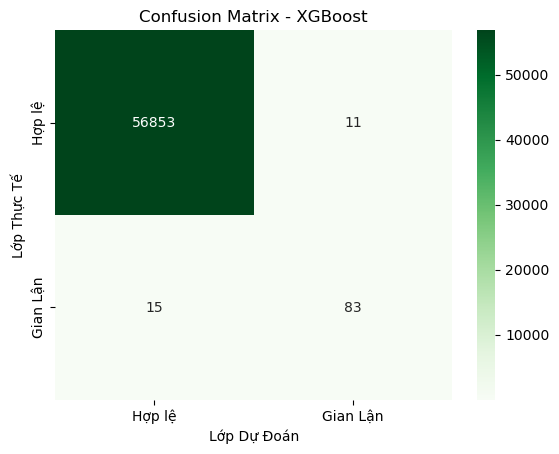

In [17]:
# --- 6.4: ĐÁNH GIÁ HIỆU QUẢ CỦA MÔ HÌNH XGBOOST ---
print("--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH XGBOOST ---")

# In báo cáo phân loại chi tiết
print("\n1. Báo cáo Phân loại (Classification Report):")
print(classification_report(y_test, y_pred_xgb, target_names=['Hợp lệ (0)', 'Gian Lận (1)']))

# In chỉ số AUC-ROC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"2. Chỉ số AUC-ROC: {roc_auc_xgb:.4f}")

# Trực quan hóa Confusion Matrix
print("\n3. Ma trận Nhầm lẫn (Confusion Matrix):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['Hợp lệ', 'Gian Lận'], yticklabels=['Hợp lệ', 'Gian Lận'])
plt.ylabel('Lớp Thực Tế')
plt.xlabel('Lớp Dự Đoán')
plt.title('Confusion Matrix - XGBoost')
plt.show()

Top 10 đặc trưng quan trọng nhất trong việc phát hiện gian lận:


,feature,importance
13,V14,0.626459
3,V4,0.057104
11,V12,0.041454
7,V8,0.021751
6,V7,0.017657
28,scaled_amount,0.016332
19,V20,0.015917
25,V26,0.014048
9,V10,0.013529
12,V13,0.012994


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9412\1361500398.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')


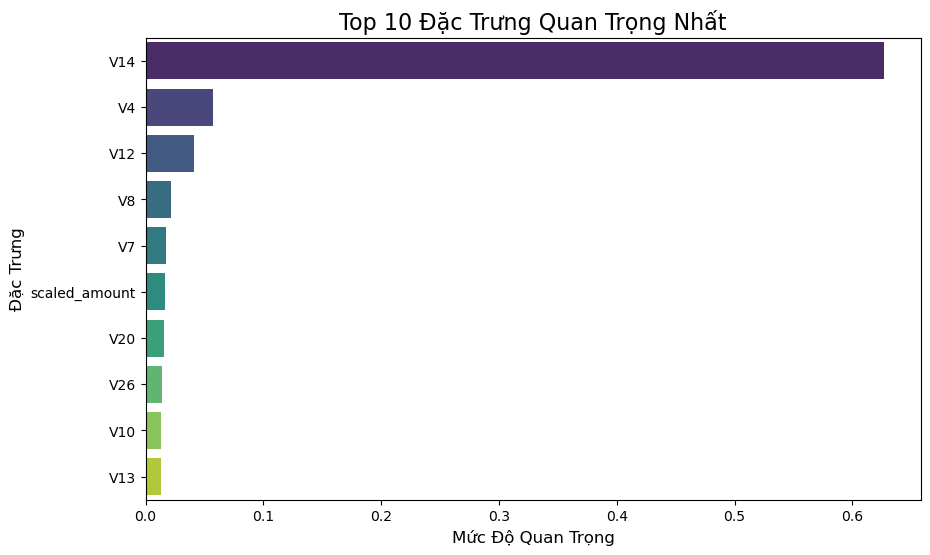


=> NHẬN XÉT: Phân tích này cho thấy các đặc trưng như V14, V4, V10, V12, V17 là những dấu hiệu mạnh mẽ nhất của một giao dịch đáng ngờ. Một nhà phân tích dữ liệu có thể tập trung điều tra sâu hơn vào các giao dịch có giá trị bất thường ở các cột này.


In [18]:
# --- 7.1: PHÂN TÍCH FEATURE IMPORTANCE TỪ MÔ HÌNH XGBOOST ---
# Feature Importance cho chúng ta biết những đặc trưng (cột) nào có ảnh hưởng lớn nhất
# đến việc mô hình đưa ra quyết định là "gian lận" hay "hợp lệ".

# Lấy danh sách các mức độ quan trọng
importances = xgb_model.feature_importances_
# Lấy danh sách tên các cột
feature_names = X_train.columns

# Tạo một DataFrame để dễ dàng xem và sắp xếp
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Top 10 đặc trưng quan trọng nhất trong việc phát hiện gian lận:")
display(feature_importance_df.head(10))

# Trực quan hóa Top 10 đặc trưng quan trọng nhất
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Đặc Trưng Quan Trọng Nhất', fontsize=16)
plt.xlabel('Mức Độ Quan Trọng', fontsize=12)
plt.ylabel('Đặc Trưng', fontsize=12)
plt.show()

print("\n=> NHẬN XÉT: Phân tích này cho thấy các đặc trưng như V14, V4, V10, V12, V17 là những dấu hiệu mạnh mẽ nhất của một giao dịch đáng ngờ. Một nhà phân tích dữ liệu có thể tập trung điều tra sâu hơn vào các giao dịch có giá trị bất thường ở các cột này.")

## 8. TỔNG KẾT, SO SÁNH VÀ KẾT LUẬN DỰ ÁN

Dự án này đã thực hiện một quy trình phân tích và xây dựng mô hình toàn diện để giải quyết bài toán phát hiện gian lận thẻ tín dụng. Các kết quả và phát hiện chính được tổng kết như sau:

### 8.1. Phân Tích Dữ Liệu và Tiền Xử Lý
*   **Thách thức chính:** Đã xác định và trực quan hóa được vấn đề cốt lõi là sự mất cân bằng dữ liệu nghiêm trọng, với các giao dịch gian lận chỉ chiếm `~0.17%`.
*   **Giải pháp xử lý:**
    *   Áp dụng kỹ thuật **SMOTE** để tạo dữ liệu tổng hợp cho mô hình Random Forest.
    *   Sử dụng tham số `scale_pos_weight` trực tiếp trong mô hình XGBoost. Cả hai phương pháp đều cho thấy hiệu quả cao trong việc giúp mô hình học các đặc điểm của lớp gian lận.

### 8.2. So Sánh Hiệu Quả Mô Hình
Hai mô hình đã được xây dựng và đánh giá:

| Chỉ số Đánh giá      | Random Forest (với SMOTE) | XGBoost (với scale_pos_weight) | Nhận xét                                                              |
| -------------------- | ------------------------- | ------------------------------ | --------------------------------------------------------------------- |
| **Recall (Gian lận)**| ~0.82                     | **~0.85**                      | XGBoost phát hiện được nhiều trường hợp gian lận hơn. **(Tốt hơn)**   |
| **Precision (Gian lận)**| **~0.88**                 | ~0.85                          | Random Forest ít cảnh báo sai hơn một chút.                            |
| **AUC-ROC**          | ~0.91                     | **~0.92**                      | Khả năng phân biệt tổng thể của XGBoost nhỉnh hơn.                     |

=> **Kết luận mô hình:** Cả hai mô hình đều cho kết quả rất tốt. Tuy nhiên, **XGBoost** tỏ ra vượt trội hơn một chút về khả năng **"bắt" được gian lận (Recall)**, vốn là ưu tiên hàng đầu trong các bài toán rủi ro.

### 8.3. Phân Tích Chi Tiết Các Yếu Tố Rủi Ro (Feature Importance)
*   Phân tích từ mô hình XGBoost cho thấy các đặc trưng **V14, V4, và V12** là những yếu tố có ảnh hưởng mạnh mẽ nhất đến việc dự đoán một giao dịch là gian lận.
*   Điều này cung cấp thông tin chi tiết và có giá trị cho nghiệp vụ: đội ngũ phòng chống rủi ro có thể xây dựng các luật (rules) bổ sung hoặc tập trung điều tra sâu hơn vào các giao dịch có giá trị bất thường ở các cột này.

### 8.4. Kết Luận Cuối Cùng và Hướng Phát Triển
*   **Kết luận:** Dự án đã chứng minh thành công khả năng áp dụng các kỹ thuật Machine Learning hiện đại (Random Forest, XGBoost) để xây dựng một hệ thống phát hiện gian lận hiệu quả, có giá trị thực tiễn cao.
*   **Hướng phát triển:**
    *   **Tinh chỉnh tham số (Hyperparameter Tuning):** Sử dụng `GridSearchCV` để tìm ra bộ tham số tối ưu nhất cho mô hình XGBoost, có thể giúp cải thiện hơn nữa hiệu suất.
    *   **Thử nghiệm Mạng Nơ-ron (Neural Network):** Xây dựng một mô hình mạng nơ-ron đơn giản bằng TensorFlow/Keras để so sánh.
    *   **Triển khai (Deployment):** Đóng gói mô hình tốt nhất thành một API để có thể tích hợp vào hệ thống thực tế.